<a href="https://colab.research.google.com/github/Aswin2270/Data-visualization/blob/main/Decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [17]:
df=pd.read_csv("/content/gender_classification.csv")
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [18]:
x=df[['long_hair','forehead_width_cm','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long']]
y=df[['gender']]
print(x)
print(y)

      long_hair  forehead_width_cm  nose_wide  nose_long  lips_thin  \
0             1               11.8          1          0          1   
1             0               14.0          0          0          1   
2             0               11.8          1          1          1   
3             0               14.4          0          1          1   
4             1               13.5          0          0          0   
...         ...                ...        ...        ...        ...   
4996          1               13.6          0          0          0   
4997          1               11.9          0          0          0   
4998          1               12.9          0          0          0   
4999          1               13.2          0          0          0   
5000          1               15.4          1          1          1   

      distance_nose_to_lip_long  
0                             1  
1                             0  
2                             1  
3          

In [19]:
x_train,y_train,x_test,y_test = train_test_split(x,y)
print(x_train)

      long_hair  forehead_width_cm  nose_wide  nose_long  lips_thin  \
4521          0               15.5          0          1          1   
4052          1               12.0          0          0          0   
245           1               11.5          0          0          1   
1644          1               12.6          0          0          1   
2493          1               12.1          1          1          1   
...         ...                ...        ...        ...        ...   
2895          0               15.5          1          1          1   
159           1               12.5          0          1          1   
2868          1               13.9          0          0          0   
3736          1               13.8          0          0          1   
3972          1               13.7          1          0          1   

      distance_nose_to_lip_long  
4521                          1  
4052                          0  
245                           0  
1644       

In [69]:
for coln in df:
  df[coln]=df[coln].astype('category').cat.codes
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,4,10,1,0,1,1,1
1,0,26,3,0,0,1,0,0
2,0,4,12,1,1,1,1,1
3,0,30,10,0,1,1,1,1
4,1,21,8,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,22,0,0,0,0,0,0
4997,1,5,3,0,0,0,0,0
4998,1,15,6,0,0,0,0,0
4999,1,18,11,0,0,0,0,0


In [46]:
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
y_train = st_x.fit_transform(y_train)

In [27]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
Classifier.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [51]:
y_pred= Classifier.predict(x)
print(y_pred)

['Male' 'Female' 'Male' ... 'Female' 'Female' 'Male']


In [52]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y,y_pred)
cm

array([[2482,   19],
       [  61, 2439]])

In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [54]:
plt.style.use('classic')

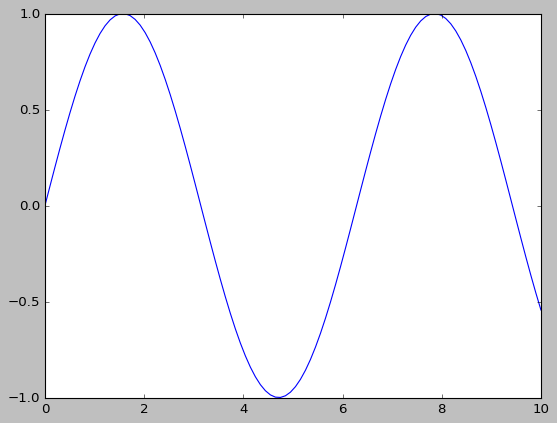

In [55]:
import matplotlib.pyplot as plt
import numpy as np
y_pred= np.linspace(0, 10, 100)
plt.plot(y_pred, np.sin(y_pred))
plt.show()

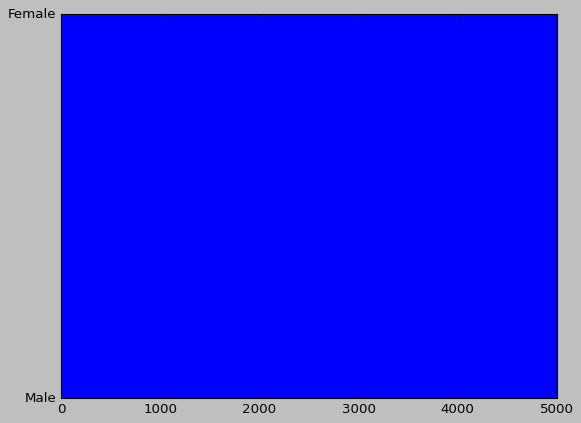

In [71]:
y_pred= Classifier.predict(x)
plt.plot(y_pred)
plt.show()

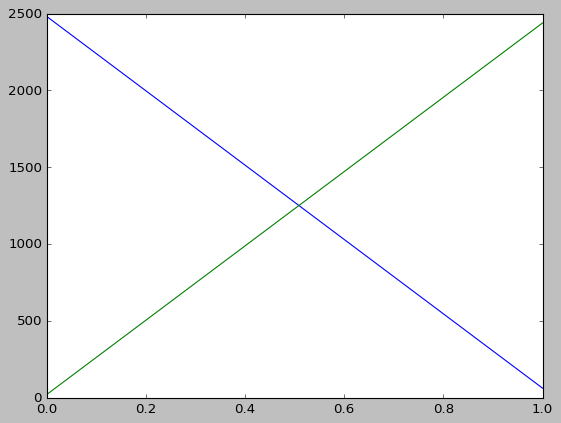

In [72]:
cm= confusion_matrix(y,y_pred)
plt.plot(cm)
plt.show()

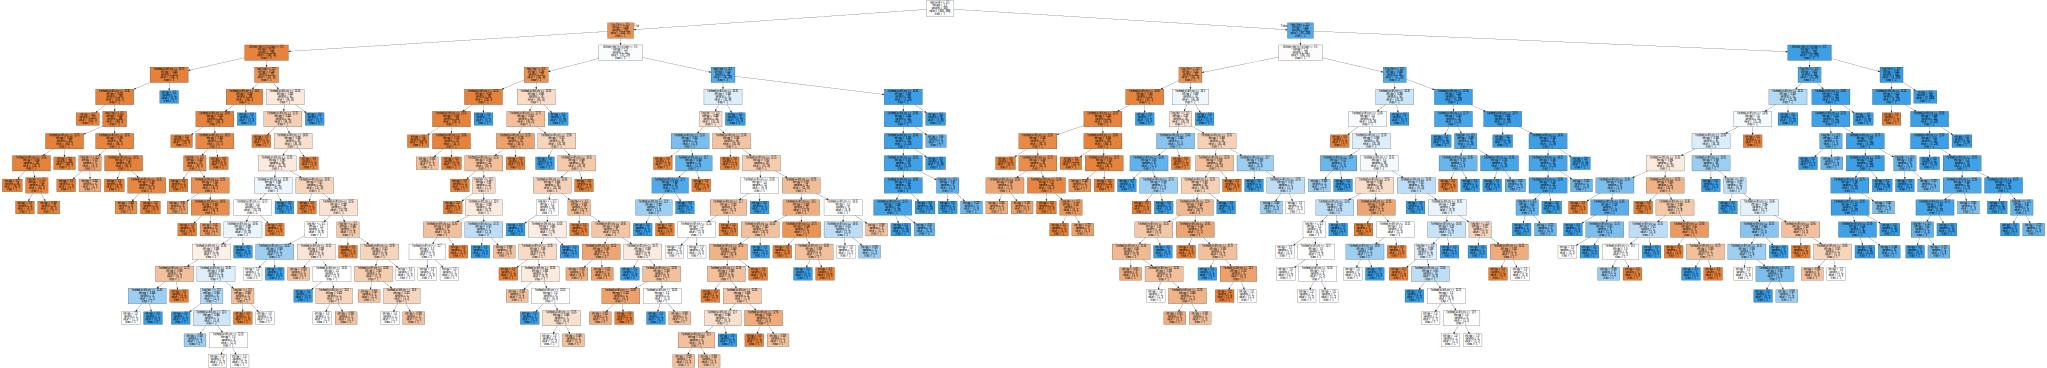

In [64]:
from sklearn.tree import export_graphviz
import graphviz
graphviz.Source(export_graphviz(Classifier,feature_names=x.columns,filled=True,class_names=['1','2','3','4','5','6','7'],out_file=None))